# Titanic
![](https://i.imgur.com/rRFchA8.png)

In [ ]:
# このセルを実行したあとどうすればいいかがわからない方は、別途配布している、Notionの「Google Colabの使用方法」をご覧ください。

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
# データの読み込み方がわからない方は、別途配布している、Notionの「Google Colabの使用方法」をご覧ください。
path =  '/content/drive/MyDrive/GCI 2025 Summer/02.コンペ1/'

df = pd.read_csv(path + 'data/train.csv')
df_test = pd.read_csv(path + 'data/test.csv')

In [ ]:
print(df.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [ ]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は891、変数は12種類です。
テストデータのデータ数は418、変数は11種類です


In [ ]:
df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,1,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
5,6,1,3,"Moran, Mr. James",male,32.252151,0,0,330877,8.4583,Q,Mr
6,7,1,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr
7,8,1,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Master
8,9,0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs
9,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs


In [ ]:
df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

　これらの変数名を、README.ipynbに示された変数の説明と対応付けておきましょう。  

変数 |定義 |備考  
---|---|---
Perished |死亡したかどうか |0 = No, 1 = Yes
Pclass |チケットのクラス |1 = 1st, 2 = 2nd, 3 = 3rd
Name |名前 |
Sex |性別 |
Age	|年齢 |
SibSp |乗船していた兄弟姉妹・配偶者の数	|
Parch |乗船していた親・子供の数	|
Ticket |チケット番号	|
Fare |チケット料金	|
Cabin |キャビン番号	|
embarked |乗船した港	|C = Cherbourg, Q = Queenstown, S = Southampton



### **EDA**

In [ ]:
# 欠損値の確認
df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


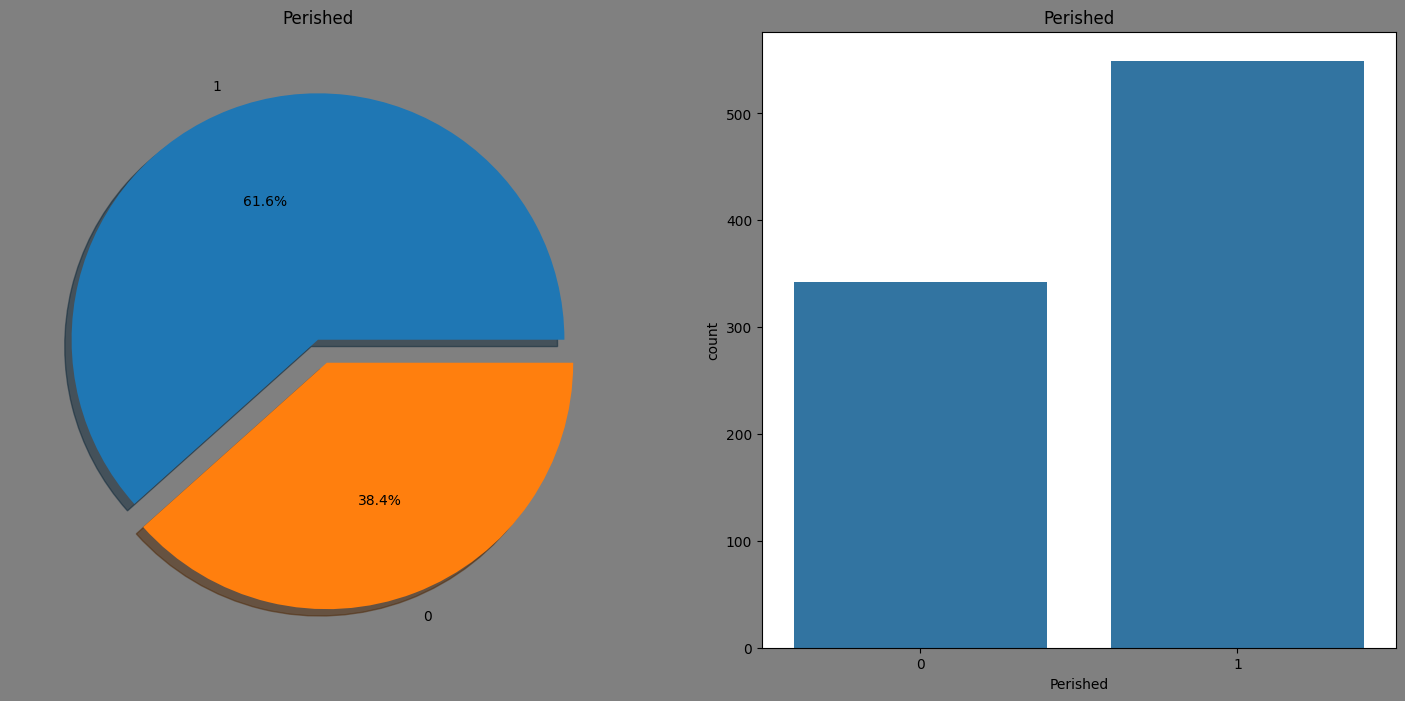

In [ ]:
# Perishedの内訳
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Perished'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Perished')
ax[0].set_ylabel('')

sns.countplot(x='Perished',data=df,ax=ax[1])
ax[1].set_title('Perished')
plt.show()

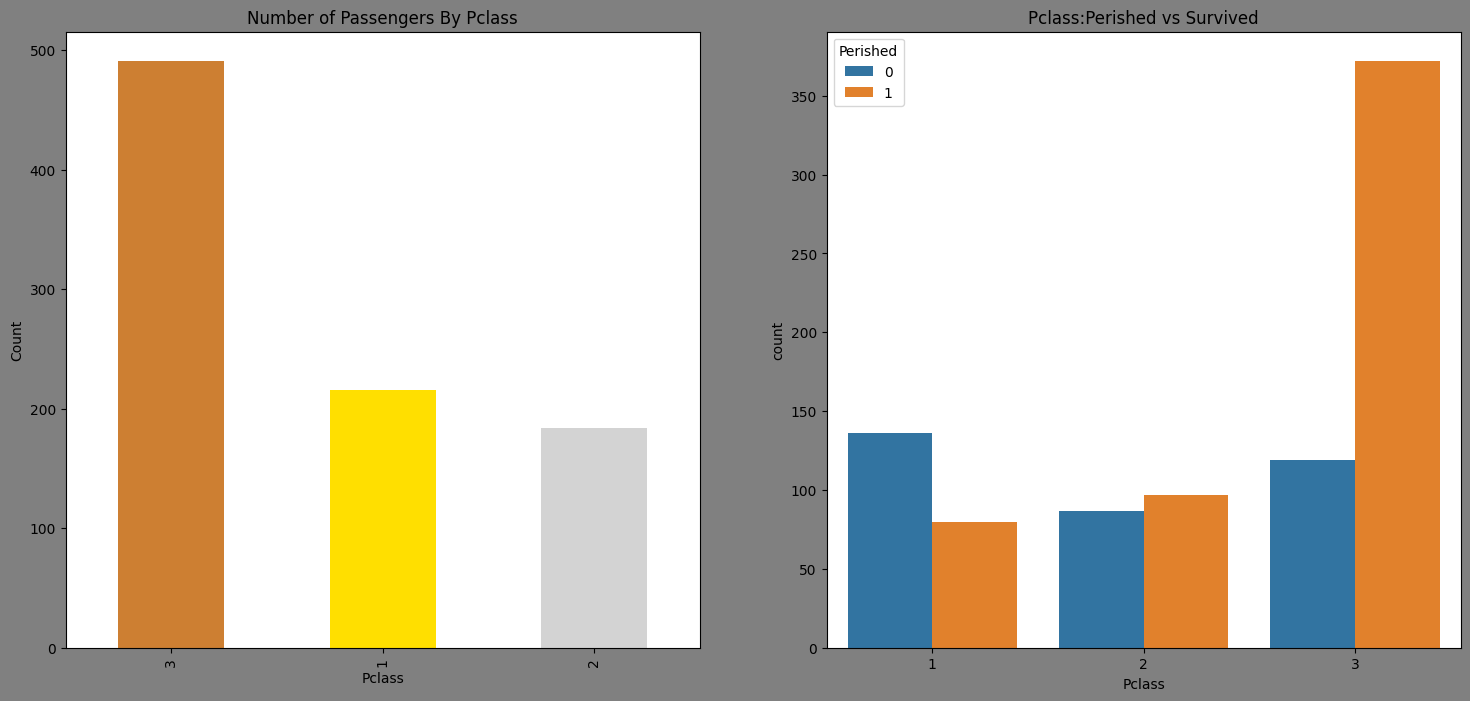

In [ ]:
# Pclassに着目
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Perished',data=df,ax=ax[1])
ax[1].set_title('Pclass:Perished vs Survived')
plt.show()

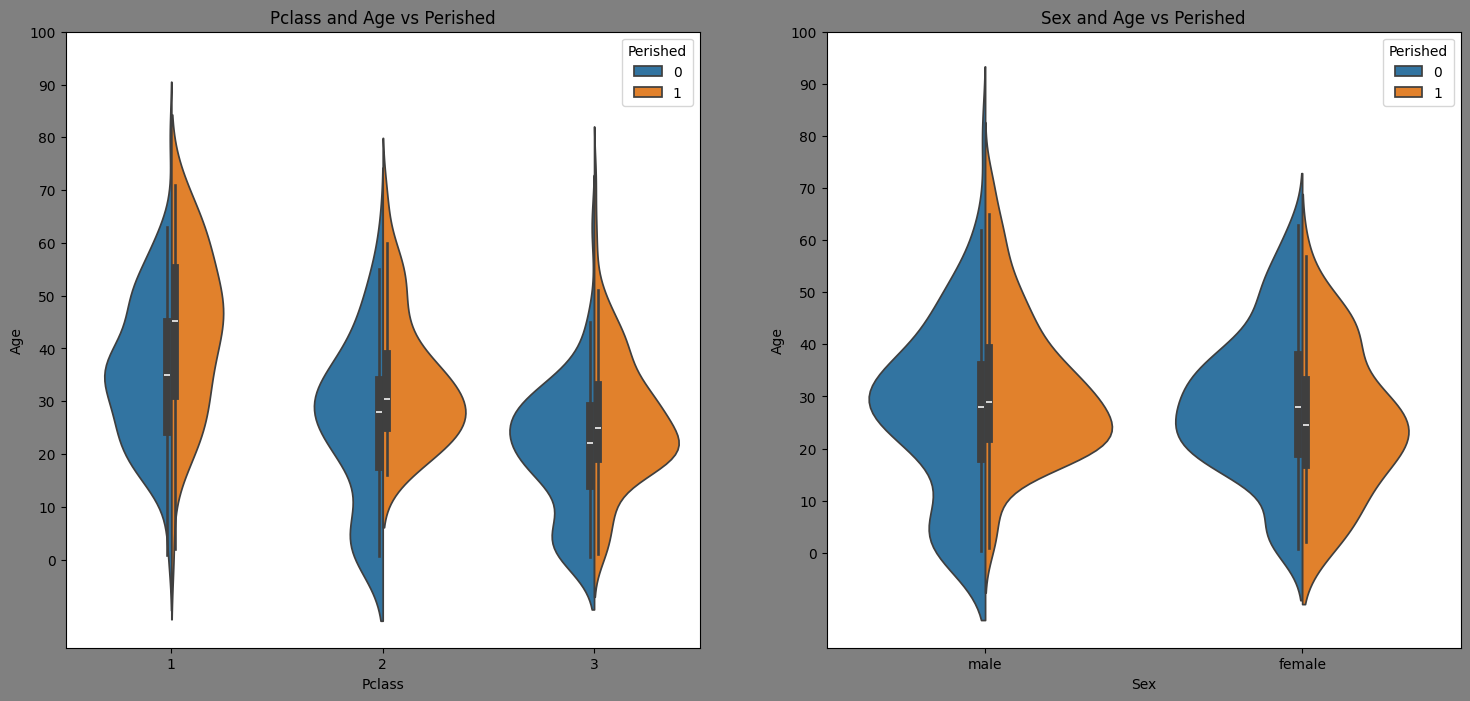

In [ ]:
# Ageに着目
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
sns.violinplot(x="Pclass",y="Age", hue="Perished", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Perished')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Perished", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Perished')
ax[1].set_yticks(range(0,110,10))
plt.show()

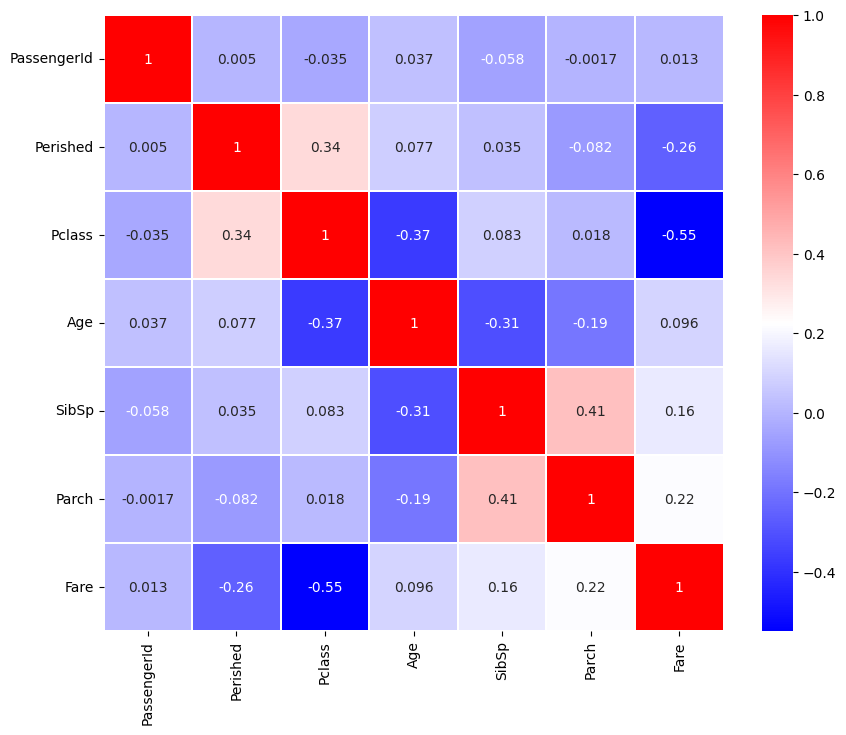

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='bwr',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## **1. データの処理**

### **欠損値の処理**

In [ ]:
# 'Age' を敬称を考慮して補完
import re

def extract_title(df_row):
    name = df_row['Name']
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        title = title_search.group(1)
        titles_to_keep = ['Mr', 'Miss', 'Mrs', 'Master']
        if title in titles_to_keep:
            return title
        else:
            return 'Other'
    return 'Other' # 敬称が見つからない場合も 'Other' とする

# 使用例：新しい 'Title' カラムを作成する
df['Title'] = df.apply(extract_title, axis=1)
df_test['Title'] = df_test.apply(extract_title, axis=1)

# dfとdf_testそれぞれの該当するTitleのAgeの欠損値を平均値で補完
for title in df['Title'].unique():
    age = pd.concat([df[df['Title'] == title]['Age'], df_test[df_test['Title'] == title]['Age']])
    mean_age = age.mean()

    df.loc[df['Title'] == title, 'Age'] = df.loc[df['Title'] == title, 'Age'].fillna(mean_age)
    df_test.loc[df_test['Title'] == title, 'Age'] = df_test.loc[df_test['Title'] == title, 'Age'].fillna(mean_age)

    print(f"Title: {title}, 平均年齢 (df+df_test): {mean_age:.2f}")

# 欠損値が埋まったか確認
print("\n欠損値確認 (df):")
print(df.isnull().sum())
print("\n欠損値確認 (df_test):")
print(df_test.isnull().sum())

'''
memo
'''
# ヴァイオリンチャート
# sns.violinplot(x="Title",y="Age", hue="Perished", data=df,split=True)
# plt.show()

# 結果を確認
# print(df['Title'].value_counts())

Title: Mr, 平均年齢 (df+df_test): 32.25
Title: Mrs, 平均年齢 (df+df_test): 36.99
Title: Miss, 平均年齢 (df+df_test): 21.77
Title: Master, 平均年齢 (df+df_test): 5.48
Title: Other, 平均年齢 (df+df_test): 42.66

欠損値確認 (df):
PassengerId      0
Perished         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

欠損値確認 (df_test):
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


'\nmemo\n'

In [ ]:
# 'Fare' を補完
fare = pd.concat([df['Fare'], df_test['Fare']])

df['Fare'].fillna(fare.mean(), inplace=True)
df_test['Fare'].fillna(fare.mean(), inplace=True)

df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# 'Cabin' を削除
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


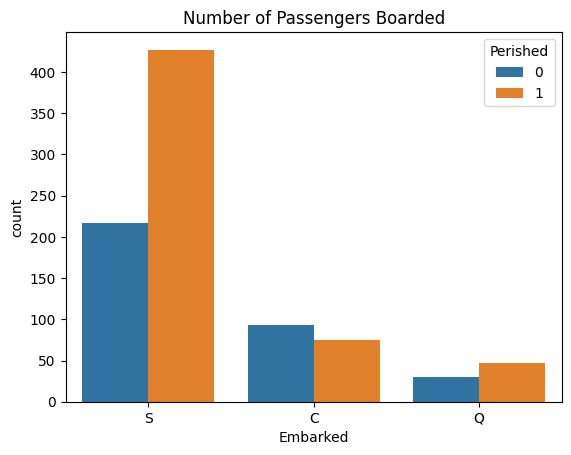

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# 'Embarked' を補完
sns.countplot(x='Embarked', hue='Perished', data=df)
plt.title('Number of Passengers Boarded')
plt.show()

df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df.isnull().sum()

### **カテゴリカルデータの処理**

In [ ]:
# 'Ticket' の削除
df.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [ ]:
# 'Sex' の数値化
df.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Title', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
# 'Embarked' のバイナリ化
embarked = pd.concat([df['Embarked'], df_test['Embarked']])

embarked_ohe = pd.get_dummies(embarked)

embarked_ohe_train = embarked_ohe[:891]
embarked_ohe_test = embarked_ohe[891:]

df = pd.concat([df, embarked_ohe_train], axis=1)
df_test = pd.concat([df_test, embarked_ohe_test], axis=1)

df.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Title', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
# 'Name' の削除
df.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Title', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
# 'Title' のバイナリ化
title = pd.concat([df['Title'], df_test['Title']])

title_ohe = pd.get_dummies(title)

title_ohe_train = title_ohe[:891]
title_ohe_test = title_ohe[891:]

df = pd.concat([df, title_ohe_train], axis=1)
df_test = pd.concat([df_test, title_ohe_test], axis=1)

df.drop('Title', axis=1, inplace=True)
df_test.drop('Title', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'C', 'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Other'],
      dtype='object')

In [ ]:
'''
memo
df1：欠損値・カテゴリカルデータの処理
'''
df1 = df.copy()
df_test1 = df_test.copy()

df1.columns

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Master,Miss,Mr,Mrs,Other
0,1,1,3,0,22.0,1,0,7.2500,False,False,True,False,False,True,False,False
1,2,0,1,1,38.0,1,0,71.2833,True,False,False,False,False,False,True,False
2,3,0,3,1,26.0,0,0,7.9250,False,False,True,False,True,False,False,False
3,4,0,1,1,35.0,1,0,53.1000,False,False,True,False,False,False,True,False
4,5,1,3,0,35.0,0,0,8.0500,False,False,True,False,False,True,False,False


In [ ]:
df1.head()

,PassengerId,Perished,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Master,Miss,Mr,Mrs,Other
0,1,1,3,0,22.0,1,0,7.2500,False,False,True,False,False,True,False,False
1,2,0,1,1,38.0,1,0,71.2833,True,False,False,False,False,False,True,False
2,3,0,3,1,26.0,0,0,7.9250,False,False,True,False,True,False,False,False
3,4,0,1,1,35.0,1,0,53.1000,False,False,True,False,False,False,True,False
4,5,1,3,0,35.0,0,0,8.0500,False,False,True,False,False,True,False,False


### **特徴量エンジニアリング**


🌟 'Sex' は'Title' で表現できる。


In [ ]:
'''
memo
'Sex' は'Title' で表現できる。
'''
# バイナリTitle列と 'Sex' の関係性を集計
title_sex_relation = pd.DataFrame()

for title_col in ['Master', 'Miss', 'Mr', 'Mrs', 'Other']:
    # 各Title列が1のデータのみを抽出し、Sexでグループ化して人数をカウント
    temp_df = df[df[title_col] == 1].groupby('Sex').size().reset_index(name='Count')
    temp_df['Title'] = title_col # Title列を追加
    title_sex_relation = pd.concat([title_sex_relation, temp_df])

# 性別を数値から名前に変換 (もし数値化されている場合)
if df['Sex'].dtype == 'int64' or df['Sex'].dtype == 'float64':
     title_sex_relation['Sex_Label'] = title_sex_relation['Sex'].map({0: 'male', 1: 'female'})
else:
    title_sex_relation['Sex_Label'] = title_sex_relation['Sex']

# 棒グラフで可視化
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Count', hue='Sex_Label', data=title_sex_relation)
plt.title('Number of Passengers by Title Category and Sex')
plt.xlabel('Title Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # ラベルが見やすいように回転
plt.tight_layout()
plt.show()

Index(['PassengerId', 'Perished', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Other'],
      dtype='object')

In [ ]:
# 'Sex' の削除
df.drop('Sex', axis=1, inplace=True)
df_test.drop('Sex', axis=1, inplace=True)

df.columns

🌟 'SibSp', 'Parch' を変形する

In [ ]:
# 'Family' 作成
df['Family'] = df['SibSp'] + df['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']

df.drop('SibSp', axis=1, inplace=True)
df_test.drop('SibSp', axis=1, inplace=True)

df.drop('Parch', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)

'''
memo
・4人家族以上は生存率低い？
'''
# print(df['Family'].value_counts())

# 棒グラフ：家族の数と死亡率の関係
# sns.countplot(x='Family', hue='Perished', data=df)
# plt.show()

# 'Family_Group' 作成
bins = [-1, 0, 3, df['Family'].max()]
labels = ['Alone', 'Small_Family', 'Large_Family']

df['Family_Group'] = pd.cut(df['Family'], bins=bins, labels=labels, right=True)
df_test['Family_Group'] = pd.cut(df_test['Family'], bins=bins, labels=labels, right=True)

print(df['Family_Group'].value_counts())

# 'Family_Group' の数値化
family = pd.concat([df['Family_Group'], df_test['Family_Group']])

family_ohe = pd.get_dummies(family)

family_ohe_train = family_ohe[:891]
family_ohe_test = family_ohe[891:]

df = pd.concat([df, family_ohe_train], axis=1)
df_test = pd.concat([df_test, family_ohe_test], axis=1)

df.drop('Family', axis=1, inplace=True)
df_test.drop('Family', axis=1, inplace=True)

df.drop('Family_Group', axis=1, inplace=True)
df_test.drop('Family_Group', axis=1, inplace=True)

Family_Group
Alone           537
Small_Family    292
Large_Family     62
Name: count, dtype: int64


,PassengerId,Perished,Pclass,Age,Fare,C,Q,S,Master,Miss,Mr,Mrs,Other,Alone,Small_Family,Large_Family
0,1,1,3,22.0,7.2500,False,False,True,False,False,True,False,False,False,True,False
1,2,0,1,38.0,71.2833,True,False,False,False,False,False,True,False,False,True,False
2,3,0,3,26.0,7.9250,False,False,True,False,True,False,False,False,True,False,False
3,4,0,1,35.0,53.1000,False,False,True,False,False,False,True,False,False,True,False
4,5,1,3,35.0,8.0500,False,False,True,False,False,True,False,False,True,False,False


🌟 'Fare' の処理

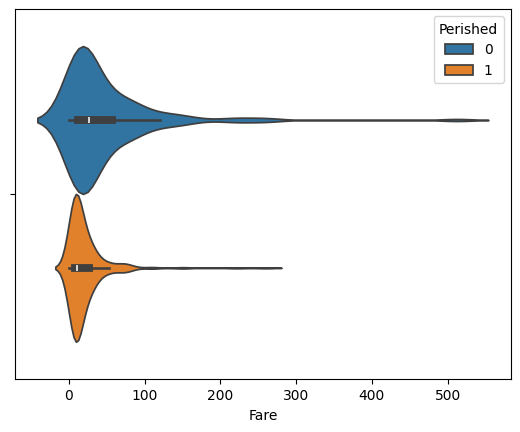

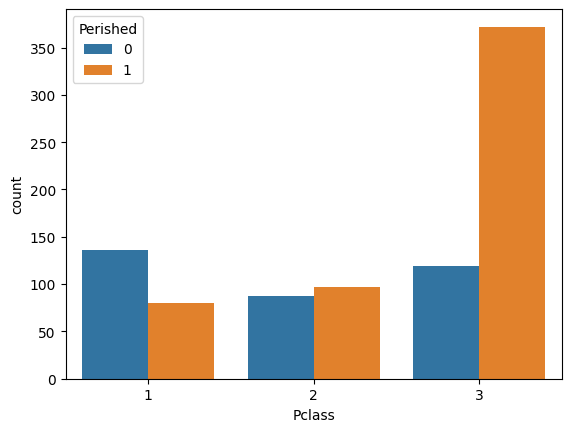

In [ ]:
sns.violinplot(x='Fare', hue='Perished', data=df2)
plt.show()

sns.countplot(x='Pclass', hue='Perished', data=df2)
plt.show()

In [ ]:
# Fareを4つの価格帯に分ける（qcutはデータ数を基準に分割）
df['Fare_Bin'] = pd.qcut(df['Fare'], 4, labels=['Very_Low', 'Low', 'High', 'Very_High'])
df_test['Fare_Bin'] = pd.qcut(df_test['Fare'], 4, labels=['Very_Low', 'Low', 'High', 'Very_High'])

# カテゴリをバイナリ化
fare_bin = pd.concat([df['Fare_Bin'], df_test['Fare_Bin']])

fare_bin_ohe = pd.get_dummies(fare_bin)

fare_bin_ohe_train = fare_bin_ohe[:891]
fare_bin_ohe_test = fare_bin_ohe[891:]

df = pd.concat([df, fare_bin_ohe_train], axis=1)
df_test = pd.concat([df_test, fare_bin_ohe_test], axis=1)

df.drop('Fare', axis=1, inplace=True)
df_test.drop('Fare', axis=1, inplace=True)

df.drop('Fare_Bin', axis=1, inplace=True)
df_test.drop('Fare_Bin', axis=1, inplace=True)

df.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Age', 'C', 'Q', 'S', 'Master',
       'Miss', 'Mr', 'Mrs', 'Other', 'Alone', 'Small_Family', 'Large_Family',
       'Fare_Bin', 'Very_Low', 'Low', 'High', 'Very_High'],
      dtype='object')

In [ ]:
'''
memo
一旦、ここまでの処理済みデータを置いておきます。
'''
df2 = df.copy()
df_test2 = df_test.copy()

df2.columns
df2.head()

,PassengerId,Perished,Pclass,Age,C,Q,S,Master,Miss,Mr,Mrs,Other,Alone,Small_Family,Large_Family,Very_Low,Low,High,Very_High
0,1,1,3,22.0,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False
1,2,0,1,38.0,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True
2,3,0,3,26.0,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False
3,4,0,1,35.0,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True
4,5,1,3,35.0,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False


🌟 **特徴量選択**

過学習を抑えるために。。

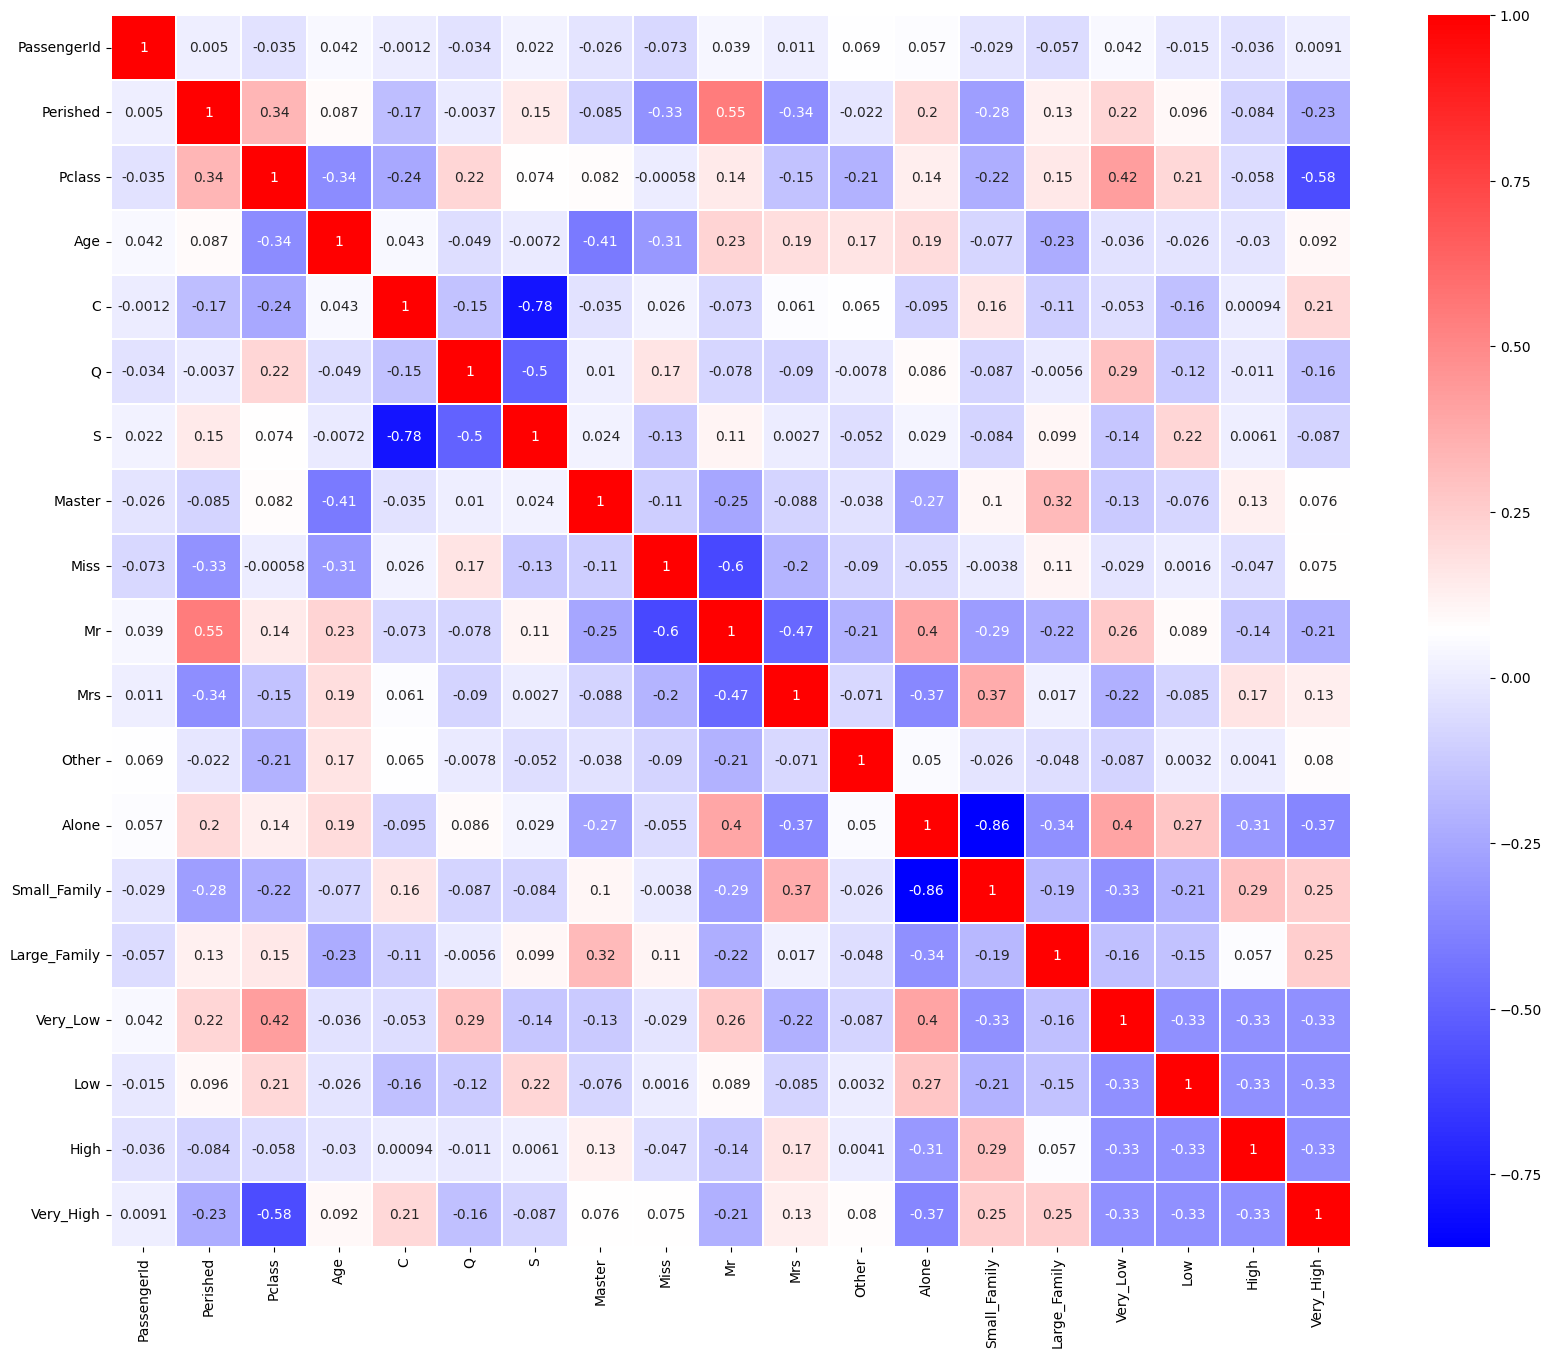

In [ ]:
'''
memo
特徴量の重複を確認
'''
df_numeric = df.select_dtypes(include=['number', 'bool'])
sns.heatmap(df_numeric.corr(),annot=True,cmap='bwr',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()

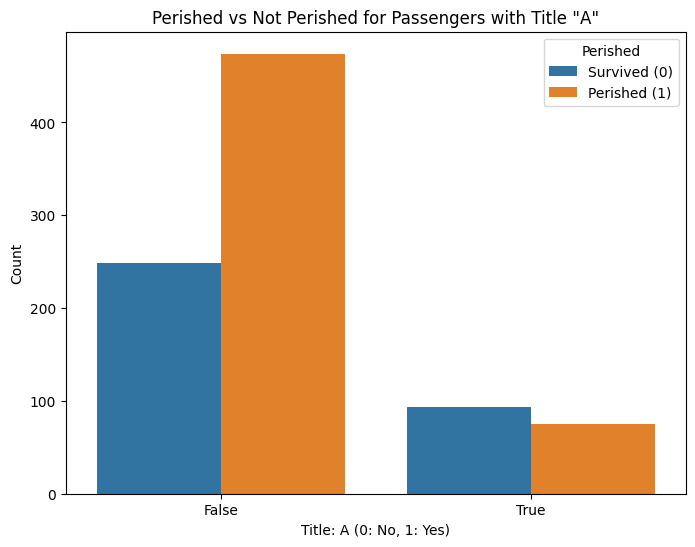

In [ ]:
# prompt: 'A'と'Perished'の関係をグラフ化したい。

# 'A' と 'Perished' の関係をグラフ化
plt.figure(figsize=(8, 6))
sns.countplot(x='C', hue='Perished', data=df)
plt.title('Perished vs Not Perished for Passengers with Title "A"')
plt.xlabel('Title: A (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Perished', labels=['Survived (0)', 'Perished (1)'])
plt.show()


In [ ]:
# 特徴量選択
df3 = df2.copy()
df_test3 = df_test2.copy()

columns_to_drop = ['Master', 'Q', 'Other', 'Low', 'High', 'Alone']

for col in columns_to_drop:
    if col in df3.columns:
        df3.drop(col, axis=1, inplace=True)
    if col in df_test3.columns:
        df_test3.drop(col, axis=1, inplace=True)

df3.columns

Index(['PassengerId', 'Perished', 'Pclass', 'Age', 'C', 'S', 'Miss', 'Mr',
       'Mrs', 'Small_Family', 'Large_Family', 'Very_Low', 'Very_High'],
      dtype='object')

## **2. ベースラインモデルの構築**

In [ ]:
df0 = df3.copy()
df_test0 = df_test3.copy()

In [ ]:
# 説明変数と目的変数に分ける
X = df0.iloc[:, 2:].values
y = df0.iloc[:, 1].values

X_test = df_test0.iloc[:, 1:].values

# 擬似訓練データの作成（ホールドアウト法：過学習対策）
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# ランダムフォレストモデルの作成
# 訓練データを学習させる
rfc = RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

print('Train Score: {}'.format(round(rfc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfc.score(X_valid, y_valid), 3)))

Train Score: 0.846
 Test Score: 0.813


**グリッドリサーチ**
：適切なハイパーパラメータを見つける。

In [ ]:
# グリッドリサーチとCVの自動化
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=5)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2}
CV Score: 0.834


In [ ]:
# グリッドリサーチ（手動）
param_grid = {'max_depth': [3, 5, 7],
              'min_samples_leaf': [1, 2, 4]}

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        rfc_grid = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                            n_estimators=100, n_jobs=-1, random_state=42)
        rfc_grid.fit(X_train, y_train)
        print('max_depth: {}, min_samples_leaf: {}'.format(max_depth, min_samples_leaf))
        print('    Train Score: {}, Test Score: {}'.format(round(rfc_grid.score(X_train, y_train), 3),
                                                           round(rfc_grid.score(X_valid, y_valid), 3)))

max_depth: 3, min_samples_leaf: 1
    Train Score: 0.831, Test Score: 0.821
max_depth: 3, min_samples_leaf: 2
    Train Score: 0.828, Test Score: 0.821
max_depth: 3, min_samples_leaf: 4
    Train Score: 0.831, Test Score: 0.813
max_depth: 5, min_samples_leaf: 1
    Train Score: 0.857, Test Score: 0.802
max_depth: 5, min_samples_leaf: 2
    Train Score: 0.852, Test Score: 0.799
max_depth: 5, min_samples_leaf: 4
    Train Score: 0.846, Test Score: 0.813
max_depth: 7, min_samples_leaf: 1
    Train Score: 0.886, Test Score: 0.795
max_depth: 7, min_samples_leaf: 2
    Train Score: 0.872, Test Score: 0.791
max_depth: 7, min_samples_leaf: 4
    Train Score: 0.857, Test Score: 0.799


**特徴量選択のヒント**

         Feature  Importance
5             Mr    0.336362
0         Pclass    0.136765
6            Mrs    0.132374
4           Miss    0.101240
1            Age    0.097264
7   Small_Family    0.048133
8   Large_Family    0.047568
3              S    0.026785
10     Very_High    0.026771
2              C    0.024926
9       Very_Low    0.021812


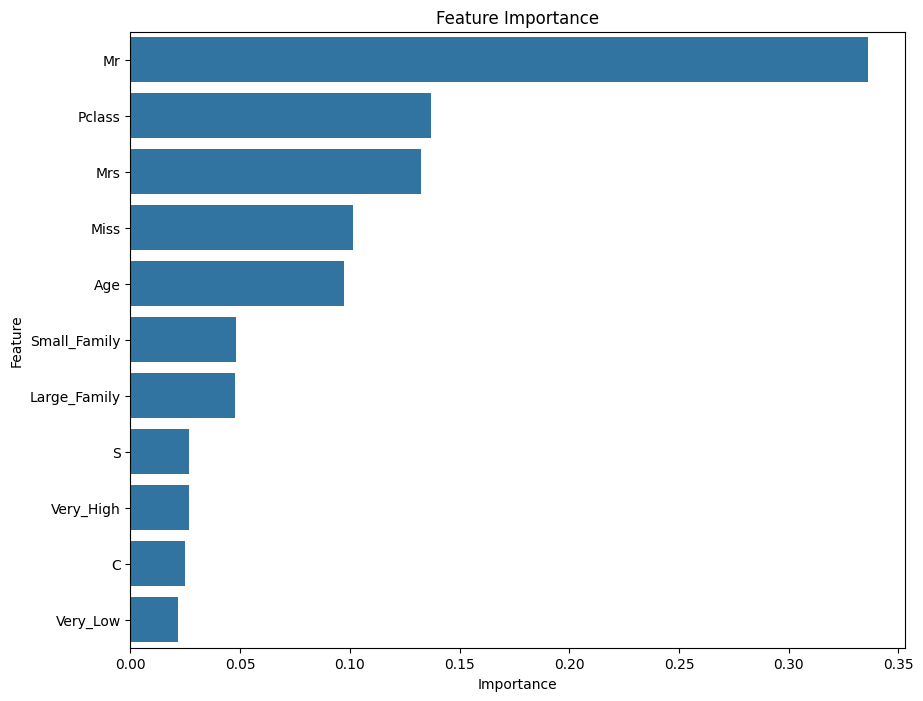

In [ ]:
# 重要でない特徴量を見つける
importances = rfc.feature_importances_
feature_names = df3.columns[2:]

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# グラフ
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## **4. 様々なモデルの構築・調整**
機械学習を用いたデータ分析では、用いる機械学習モデルを多様化し、**アンサンブリング**することによって、各々の特性をキャンセルすることができる。

注：以下２つのモデルにおいてもグリッドリサーチを行うこと。

In [ ]:
# ロジスティック回帰モデル
lr = LogisticRegression(random_state=42, solver='liblinear', max_iter=200)
lr.fit(X_train, y_train)

print('Logistic Regression \n')
print('Train Score: {}'.format(round(lr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(lr.score(X_valid, y_valid), 3)))


# クロスバリデーション
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'penalty': ['l1', 'l2']} # l1, l2正則化も探索
lr_gs = GridSearchCV(lr, param_grid_lr, cv=5)
lr_gs.fit(X, y)

print('Best Parameters: {}'.format(lr_gs.best_params_))
print('CV Score: {}'.format(round(lr_gs.best_score_, 3)))

Logistic Regression 

Train Score: 0.823
 Test Score: 0.817
Best Parameters: {'C': 1, 'penalty': 'l1'}
CV Score: 0.827


In [ ]:
'''
# 多層パーセプトロンモデル
mlpc = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0)
mlpc.fit(X_train, y_train)

print('Multilayer Perceptron \n')
print('Train Score: {}'.format(round(mlpc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(mlpc.score(X_valid, y_valid), 3)))
'''

Multilayer Perceptron 

Train Score: 0.836
 Test Score: 0.817


In [ ]:
# --- 1. データのスケーリング（必須！） ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
# GridSearchCV用に全データもスケーリングしておく
X_scaled = scaler.fit_transform(X)


# --- 2. ベースラインモデルの確認（スケーリング済みデータを使用） ---
print('--- Baseline MLP Classifier (on Scaled Data) ---')
mlpc_base = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0, max_iter=500)
mlpc_base.fit(X_train_scaled, y_train)
print('Train Score: {}'.format(round(mlpc_base.score(X_train_scaled, y_train), 3)))
print('Test Score: {}'.format(round(mlpc_base.score(X_valid_scaled, y_valid), 3)))


# --- 3. GridSearchCVによるハイパーパラメータ探索 ---
print('\n--- GridSearchCV for MLP Classifier ---')

# 探索するパラメータの範囲
param_grid_mlpc = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'activation': ['relu', 'tanh'],
    'hidden_layer_sizes': [(100, 100, 10)] # 今回はアーキテクチャは固定
}

# ベースとなるモデル
# max_iterは収束エラーを防ぐために少し多めに設定
mlpc_for_gs = MLPClassifier(random_state=0, max_iter=1000)

# グリッドサーチの実行
# ★★★ 必ずスケーリング済みのデータ(X_scaled)を使う ★★★
mlpc_gs = GridSearchCV(mlpc_for_gs, param_grid_mlpc, cv=5)
mlpc_gs.fit(X_scaled, y)

# 結果の表示
print('Best Parameters: {}'.format(mlpc_gs.best_params_))
print('Best CV Score: {}'.format(round(mlpc_gs.best_score_, 3)))

--- Baseline MLP Classifier (on Scaled Data) ---
Train Score: 0.88
Test Score: 0.799

--- GridSearchCV for MLP Classifier ---
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 10)}
Best CV Score: 0.814


　これで、ランダムフォレスト・ロジスティック回帰・多層パーセプトロンという三つのモデルが得られました。

## **5. モデルのアンサンブリング**

In [ ]:
# モデルのアンサンブル
rfc_pred = rfc.predict_proba(X_test)
lr_pred = lr.predict_proba(X_test)

pred_proba = (rfc_pred + lr_pred + mlpc_pred) / 2
pred = pred_proba.argmax(axis=1)

　このようにして提出すべき予測値が得られました。

## **6. 予測の出力・提出**

In [ ]:
 # 'gender_submission.csv'のPerishedを上書き
path =  '/content/drive/MyDrive/GCI 2025 Summer/02.コンペ1/'

submission = pd.read_csv(path + 'gender_submission.csv')
submission['Perished'] = pred
submission

,PassengerId,Perished
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [ ]:
# csvファイルの作成
output_folder_path = '/content/drive/MyDrive/GCI 2025 Summer/02.コンペ1/'
output_filename = 'submission.csv'
output_full_path = output_folder_path + output_filename
submission.to_csv(output_full_path, index=False)

print(f'"{output_filename}" として出力しました。')

"submission.csv" として出力しました。
